   # Exploratory Data Analysis of Celeb Update Project
   <img src="https://99thingstodobeforeidie.com/wp-content/uploads/2020/09/Update-Loading.jpg">

## About Datasets  :-<img src="https://miro.medium.com/max/3846/1*_STk17DQhsLACP3P69IzEw.png">
CelebFaces Attributes Dataset (CelebA) is a large-scale face attributes dataset with more than 200K celebrity 
images, each with 40 attribute annotations. The images in this dataset cover large pose variations and background
clutter. CelebA has large diversities, large quantities, and rich annotations, including - 10,177 number of identities,
202,599 number of face images, and - 5 landmark locations, 40 binary attributes annotations per image. 

## Content Information :-
1. 202,599 number of face images of various celebrities
2. 10,177 unique identities, but names of identities are not given
3. 40 binary attribute annotations per image
3. 5 landmark locations

In [125]:
# Import Required Library For EDA

import numpy as np
import scipy as sp
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [126]:
# Import All Required Data For EDA

dataset_1 = pd.read_csv('list_attr_celeba.csv.zip')
dataset_2 = pd.read_csv('list_bbox_celeba.csv.zip')
dataset_3 = pd.read_csv('list_eval_partition.csv.zip')
dataset_4 = pd.read_csv('list_landmarks_align_celeba.csv.zip')

In [127]:
# Details Inforation About Dataset_1

dataset_1.head(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [128]:
# Details Inforation About Dataset_1

dataset_1.tail(5)

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
202594,202595.jpg,-1,-1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,-1,1,1,-1,-1,-1,1,-1,1,...,-1,1,-1,1,1,-1,1,-1,-1,1
202598,202599.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [129]:
# Shape of THe Dataset_1

dataset_1.shape

(202599, 41)

In [130]:
# Discriptions Of Dataset_1 

dataset_1.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,-0.777728,-0.466039,0.02501,-0.590857,-0.955113,-0.696849,-0.518408,-0.530935,-0.521498,-0.704016,...,-0.886979,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234
std,0.628602,0.884766,0.99969,0.806778,0.296241,0.717219,0.855135,0.847414,0.853255,0.710186,...,0.461811,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982
min,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [131]:
# Details Discriptions Of Column

dataset_1.nunique()

image_id               202599
5_o_Clock_Shadow            2
Arched_Eyebrows             2
Attractive                  2
Bags_Under_Eyes             2
Bald                        2
Bangs                       2
Big_Lips                    2
Big_Nose                    2
Black_Hair                  2
Blond_Hair                  2
Blurry                      2
Brown_Hair                  2
Bushy_Eyebrows              2
Chubby                      2
Double_Chin                 2
Eyeglasses                  2
Goatee                      2
Gray_Hair                   2
Heavy_Makeup                2
High_Cheekbones             2
Male                        2
Mouth_Slightly_Open         2
Mustache                    2
Narrow_Eyes                 2
No_Beard                    2
Oval_Face                   2
Pale_Skin                   2
Pointy_Nose                 2
Receding_Hairline           2
Rosy_Cheeks                 2
Sideburns                   2
Smiling                     2
Straight_H

In [132]:
#  Check to Datasets Cleaned Or Not-Cleaned (Note:- If value then Drop it)

dataset_1.isnull().sum()

image_id               0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0
No_Beard               0
Oval_Face              0
Pale_Skin              0
Pointy_Nose            0
Receding_Hairline      0
Rosy_Cheeks            0
Sideburns              0
Smiling                0
Straight_Hair          0
Wavy_Hair              0
Wearing_Earrings       0
Wearing_Hat            0
Wearing_Lipstick       0
Wearing_Necklace       0
Wearing_Necktie        0


<AxesSubplot:>

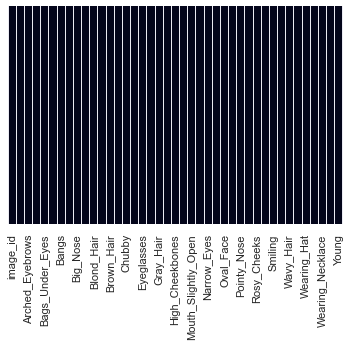

In [133]:
# Check The Image of Cleaning Data

sns.heatmap(dataset_1.isnull(), yticklabels = False , cbar = False)

In [134]:
# Details Inforation About Dataset_2

dataset_2.head(5)

,image_id,x_1,y_1,width,height
0,000001.jpg,95,71,226,313
1,000002.jpg,72,94,221,306
2,000003.jpg,216,59,91,126
3,000004.jpg,622,257,564,781
4,000005.jpg,236,109,120,166


In [135]:
# Details Inforation About Dataset_2

dataset_2.tail(5)

,image_id,x_1,y_1,width,height
202594,202595.jpg,1381,91,221,306
202595,202596.jpg,137,129,114,158
202596,202597.jpg,53,76,91,126
202597,202598.jpg,195,28,91,126
202598,202599.jpg,101,101,179,248


In [136]:
# Shape of THe Dataset_2

dataset_2.shape

(202599, 5)

In [137]:
# Discriptions Of Dataset_2

dataset_2.describe()

,x_1,y_1,width,height
count,202599.000000,202599.000000,202599.000000,202599.000000
mean,156.764564,84.335505,194.754061,268.922329
std,164.518135,76.067284,141.770066,195.664936
min,1.000000,0.000000,0.000000,0.000000
25%,69.000000,44.000000,120.000000,166.000000
50%,110.000000,68.000000,164.000000,227.000000
75%,181.000000,98.000000,221.000000,306.000000
max,3840.000000,1858.000000,3827.000000,5299.000000


In [138]:
# Details Discriptions Of Column

dataset_2.nunique()

image_id    202599
x_1           1550
y_1            901
width         1016
height        1249
dtype: int64

In [139]:
#  Check to Datasets Cleaned Or Not-Cleaned (Note:- If value then Drop it)

dataset_2.isnull().sum()

image_id    0
x_1         0
y_1         0
width       0
height      0
dtype: int64

<AxesSubplot:>

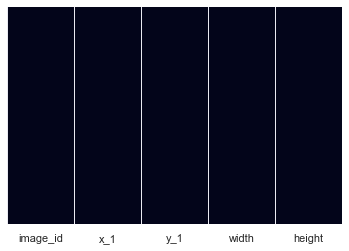

In [140]:
# Check The Image of Cleaning Data

sns.heatmap(dataset_2.isnull(), yticklabels = False , cbar = False)

In [141]:
# Details Inforation About Dataset_3

dataset_3.head(5)

,image_id,partition
0,000001.jpg,0
1,000002.jpg,0
2,000003.jpg,0
3,000004.jpg,0
4,000005.jpg,0


In [142]:
# Details Inforation About Dataset_3

dataset_3.tail(5)

,image_id,partition
202594,202595.jpg,2
202595,202596.jpg,2
202596,202597.jpg,2
202597,202598.jpg,2
202598,202599.jpg,2


In [143]:
# Shape of THe Dataset_3

dataset_3.shape

(202599, 2)

In [144]:
# Discriptions Of Dataset_3 

dataset_3.describe()

,partition
count,202599.000000
mean,0.295120
std,0.636463
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,2.000000


In [145]:
# Details Discriptions Of Column

dataset_3.nunique()

image_id     202599
partition         3
dtype: int64

In [146]:
#  Check to Datasets Cleaned Or Not-Cleaned (Note:- If value then Drop it)

dataset_3.isnull().sum()

image_id     0
partition    0
dtype: int64

<AxesSubplot:>

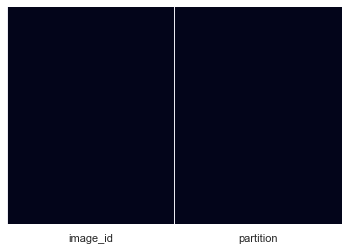

In [147]:
# Check The Image of Cleaning Data

sns.heatmap(dataset_3.isnull(), yticklabels = False , cbar = False)

In [148]:
# Details Inforation About Dataset_4

dataset_4.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
0,000001.jpg,69,109,106,113,77,142,73,152,108,154
1,000002.jpg,69,110,107,112,81,135,70,151,108,153
2,000003.jpg,76,112,104,106,108,128,74,156,98,158
3,000004.jpg,72,113,108,108,101,138,71,155,101,151
4,000005.jpg,66,114,112,112,86,119,71,147,104,150


In [149]:
# Details Inforation About Dataset_4

dataset_4.tail(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
202594,202595.jpg,69,111,108,111,89,140,73,151,104,153
202595,202596.jpg,67,112,110,112,85,141,66,150,110,150
202596,202597.jpg,69,111,107,111,92,137,68,151,109,153
202597,202598.jpg,69,111,108,111,90,137,71,153,106,151
202598,202599.jpg,68,111,109,112,81,136,75,150,103,152


In [150]:
# Shape of THe Dataset_4

dataset_4.shape

(202599, 11)

In [151]:
# Discriptions Of Dataset_4 

dataset_4.describe()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,69.353867,111.197982,107.644031,111.161600,88.063140,135.102024,71.247459,152.113011,105.586429,152.194660
std,1.717952,1.129284,1.690252,1.169229,6.647733,4.245078,3.168011,1.799343,3.233125,1.752368
min,56.000000,98.000000,90.000000,95.000000,57.000000,93.000000,57.000000,116.000000,82.000000,114.000000
25%,68.000000,111.000000,107.000000,111.000000,84.000000,133.000000,69.000000,151.000000,103.000000,151.000000
50%,69.000000,111.000000,108.000000,111.000000,88.000000,135.000000,72.000000,152.000000,105.000000,152.000000
75%,70.000000,112.000000,109.000000,112.000000,92.000000,138.000000,73.000000,153.000000,108.000000,153.000000
max,88.000000,129.000000,124.000000,122.000000,121.000000,156.000000,90.000000,174.000000,120.000000,173.000000


In [152]:
# Details Discriptions Of Column

dataset_4.nunique()

image_id        202599
lefteye_x           31
lefteye_y           27
righteye_x          32
righteye_y          25
nose_x              65
nose_y              55
leftmouth_x         34
leftmouth_y         33
rightmouth_x        37
rightmouth_y        36
dtype: int64

In [153]:
#  Check to Datasets Cleaned Or Not-Cleaned (Note:- If value then Drop it)

dataset.isnull().sum()

image_id               0
lefteye_x              0
lefteye_y              0
righteye_x             0
righteye_y             0
nose_x                 0
nose_y                 0
leftmouth_x            0
leftmouth_y            0
rightmouth_x           0
rightmouth_y           0
partition              0
x_1                    0
y_1                    0
width                  0
height                 0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0


<AxesSubplot:>

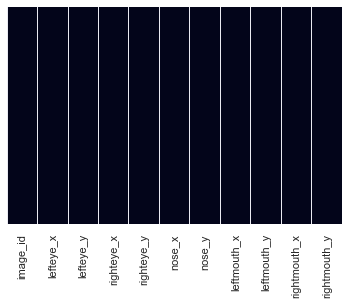

In [154]:
# Check The Image of Cleaning Data

sns.heatmap(dataset_4.isnull(), yticklabels = False , cbar = False)

In [155]:
# Cocatinate All Dataset (Dataset_1 , Dataset_2 , Dataset_3 , Dataset_4 ) in Single Dataset 

dataset = pd.read_csv('celeba_total_dataset.csv')

#detailed Information About Concatineted  Dataset

dataset.head(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,69,109,106,113,77,142,73,152,108,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,69,110,107,112,81,135,70,151,108,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,76,112,104,106,108,128,74,156,98,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,72,113,108,108,101,138,71,155,101,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,66,114,112,112,86,119,71,147,104,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [156]:
#detailed Information About Concatineted  Dataset

dataset.tail(5)

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
202594,202595.jpg,69,111,108,111,89,140,73,151,104,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
202595,202596.jpg,67,112,110,112,85,141,66,150,110,...,-1,1,1,-1,-1,-1,-1,-1,-1,1
202596,202597.jpg,69,111,107,111,92,137,68,151,109,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
202597,202598.jpg,69,111,108,111,90,137,71,153,106,...,-1,1,-1,1,1,-1,1,-1,-1,1
202598,202599.jpg,68,111,109,112,81,136,75,150,103,...,-1,-1,-1,1,-1,-1,1,-1,-1,1


In [157]:
# Discriptions Of Dataset 

dataset.describe()

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,69.353867,111.197982,107.644031,111.161600,88.063140,135.102024,71.247459,152.113011,105.586429,152.194660,...,-0.886979,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234
std,1.717952,1.129284,1.690252,1.169229,6.647733,4.245078,3.168011,1.799343,3.233125,1.752368,...,0.461811,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982
min,56.000000,98.000000,90.000000,95.000000,57.000000,93.000000,57.000000,116.000000,82.000000,114.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,68.000000,111.000000,107.000000,111.000000,84.000000,133.000000,69.000000,151.000000,103.000000,151.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,69.000000,111.000000,108.000000,111.000000,88.000000,135.000000,72.000000,152.000000,105.000000,152.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,70.000000,112.000000,109.000000,112.000000,92.000000,138.000000,73.000000,153.000000,108.000000,153.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,88.000000,129.000000,124.000000,122.000000,121.000000,156.000000,90.000000,174.000000,120.000000,173.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [158]:
# Shape Of Dataset Row = (202599) , Column = (56)

dataset.shape      

(202599, 56)

In [159]:
#  Check The Columns Name Of Datasets 

dataset.columns

Index(['image_id', 'lefteye_x', 'lefteye_y', 'righteye_x', 'righteye_y',
       'nose_x', 'nose_y', 'leftmouth_x', 'leftmouth_y', 'rightmouth_x',
       'rightmouth_y', 'partition', 'x_1', 'y_1', 'width', 'height',
       '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive', 'Bags_Under_Eyes',
       'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair',
       'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin',
       'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones',
       'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard',
       'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline',
       'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair',
       'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick',
       'Wearing_Necklace', 'Wearing_Necktie', 'Young'],
      dtype='object')

In [160]:
# Check Columns Name's Description

dataset['lefteye_x'].unique()   #dataset['column_name'].unique()

array([69, 76, 72, 66, 71, 70, 68, 67, 74, 73, 75, 64, 62, 65, 82, 80, 63,
       77, 78, 81, 79, 85, 61, 84, 83, 60, 86, 56, 88, 87, 59],
      dtype=int64)

In [161]:
# Details Discriptions Of Column

dataset.nunique()

image_id               202599
lefteye_x                  31
lefteye_y                  27
righteye_x                 32
righteye_y                 25
nose_x                     65
nose_y                     55
leftmouth_x                34
leftmouth_y                33
rightmouth_x               37
rightmouth_y               36
partition                   3
x_1                      1550
y_1                       901
width                    1016
height                   1249
5_o_Clock_Shadow            2
Arched_Eyebrows             2
Attractive                  2
Bags_Under_Eyes             2
Bald                        2
Bangs                       2
Big_Lips                    2
Big_Nose                    2
Black_Hair                  2
Blond_Hair                  2
Blurry                      2
Brown_Hair                  2
Bushy_Eyebrows              2
Chubby                      2
Double_Chin                 2
Eyeglasses                  2
Goatee                      2
Gray_Hair 

In [162]:
#  Check to Datasets Cleaned Or Not-Cleaned (Note:- If true then Drop it)

dataset.isnull()

,image_id,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202594,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202595,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202596,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
202597,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [163]:
#  Check to Datasets Cleaned Or Not-Cleaned (Note:- If value then Drop it)

dataset.isnull().sum()

image_id               0
lefteye_x              0
lefteye_y              0
righteye_x             0
righteye_y             0
nose_x                 0
nose_y                 0
leftmouth_x            0
leftmouth_y            0
rightmouth_x           0
rightmouth_y           0
partition              0
x_1                    0
y_1                    0
width                  0
height                 0
5_o_Clock_Shadow       0
Arched_Eyebrows        0
Attractive             0
Bags_Under_Eyes        0
Bald                   0
Bangs                  0
Big_Lips               0
Big_Nose               0
Black_Hair             0
Blond_Hair             0
Blurry                 0
Brown_Hair             0
Bushy_Eyebrows         0
Chubby                 0
Double_Chin            0
Eyeglasses             0
Goatee                 0
Gray_Hair              0
Heavy_Makeup           0
High_Cheekbones        0
Male                   0
Mouth_Slightly_Open    0
Mustache               0
Narrow_Eyes            0


<AxesSubplot:>

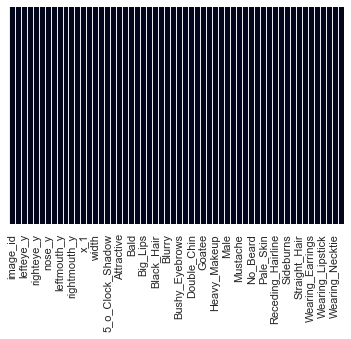

In [164]:
# Check The Image of Cleaning Data

sns.heatmap(dataset.isnull(), yticklabels = False , cbar = False)

<AxesSubplot:title={'center':"Graph Representation's B/N Columns 1:5"}, ylabel='Frequency'>

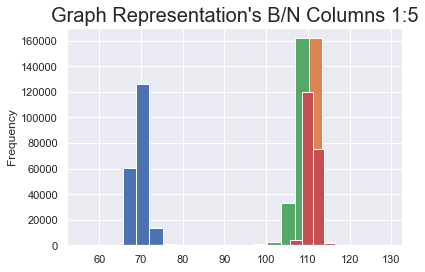

In [165]:
# Histogram's Graph Representation Of lefteye_x , lefteye_y , righteye_x , righteye_y  


plt.title("Graph Representation's B/N Columns 1:5" , fontsize = 20)
dataset["lefteye_x"].plot.hist()
dataset["lefteye_y"].plot.hist()
dataset["righteye_x"].plot.hist()
dataset["righteye_y"].plot.hist()

<AxesSubplot:title={'center':"Graph Representation's B/N Columns 7:11"}, ylabel='Frequency'>

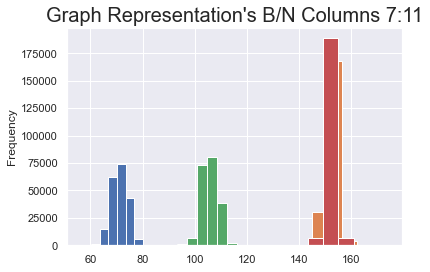

In [166]:
# Histogram's Graph Representation Of leftmouth_x , leftmouth_y , rightmouth_x , rightmouth_y  

plt.title("Graph Representation's B/N Columns 7:11" , fontsize = 20)
dataset["leftmouth_x"].plot.hist()
dataset["leftmouth_y"].plot.hist()
dataset["rightmouth_x"].plot.hist()
dataset["rightmouth_y"].plot.hist()

<AxesSubplot:title={'center':"Graph Representation's B/N Columns 13:17"}, ylabel='Frequency'>

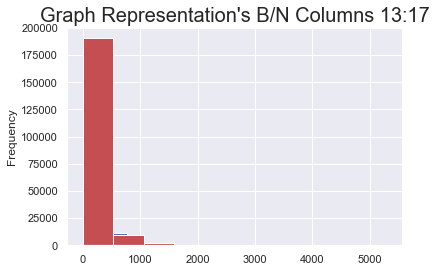

In [167]:
# Histogrm's Graph Representation Of x_1 , y_1 , width , height 

plt.title("Graph Representation's B/N Columns 13:17" , fontsize = 20)
dataset["x_1"].plot.hist()
dataset["y_1"].plot.hist()
dataset["width"].plot.hist()
dataset["height"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

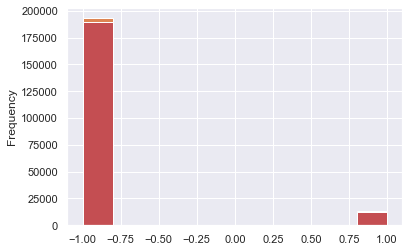

In [168]:
dataset["Chubby"].plot.hist()
dataset["Double_Chin"].plot.hist()
dataset["Eyeglasses"].plot.hist()
dataset["Goatee"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

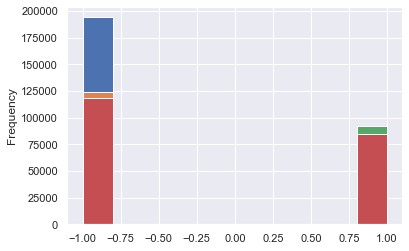

In [169]:
dataset["Gray_Hair"].plot.hist()
dataset["Heavy_Makeup"].plot.hist()
dataset["High_Cheekbones"].plot.hist()
dataset["Male"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

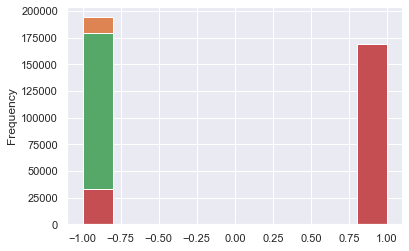

In [170]:
dataset["Mouth_Slightly_Open"].plot.hist()
dataset["Mustache"].plot.hist()
dataset["Narrow_Eyes"].plot.hist()
dataset["No_Beard"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

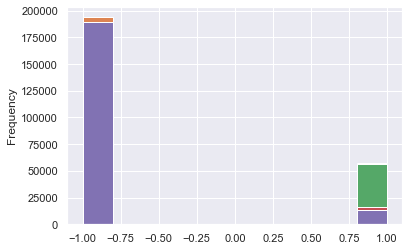

In [171]:
dataset["Oval_Face"].plot.hist()
dataset["Pale_Skin"].plot.hist()
dataset["Pointy_Nose"].plot.hist()
dataset["Receding_Hairline"].plot.hist()
dataset["Rosy_Cheeks"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

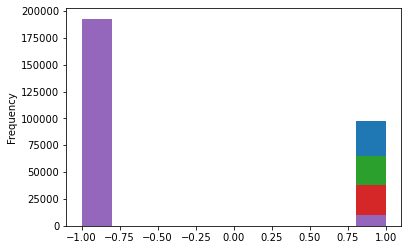

In [114]:
dataset["Smiling"].plot.hist()
dataset["Straight_Hair"].plot.hist()
dataset["Wavy_Hair"].plot.hist()
dataset["Wearing_Earrings"].plot.hist()
dataset["Wearing_Hat"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

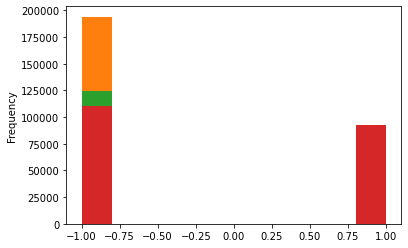

In [115]:
dataset["Goatee"].plot.hist()
dataset["Gray_Hair"].plot.hist()
dataset["Heavy_Makeup"].plot.hist()
dataset["High_Cheekbones"].plot.hist()

<AxesSubplot:title={'center':"Graph Representation's B/N Columns"}, ylabel='Frequency'>

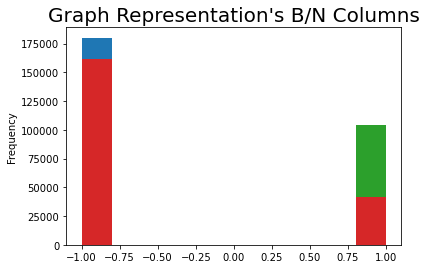

In [116]:
plt.title("Graph Representation's B/N Columns" , fontsize = 20)
dataset["5_o_Clock_Shadow"].plot.hist()
dataset["Arched_Eyebrows"].plot.hist()
dataset["Attractive"].plot.hist()
dataset["Bags_Under_Eyes"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

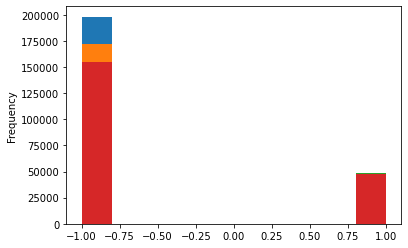

In [117]:
dataset["Bald"].plot.hist()
dataset["Bangs"].plot.hist()
dataset["Big_Lips"].plot.hist()
dataset["Big_Nose"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

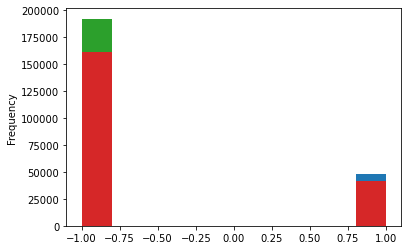

In [118]:
dataset["Black_Hair"].plot.hist()
dataset["Blond_Hair"].plot.hist()
dataset["Blurry"].plot.hist()
dataset["Brown_Hair"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

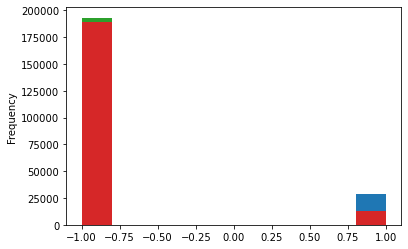

In [119]:
dataset["Bushy_Eyebrows"].plot.hist()
dataset["Chubby"].plot.hist()
dataset["Double_Chin"].plot.hist()
dataset["Eyeglasses"].plot.hist()

<AxesSubplot:ylabel='Frequency'>

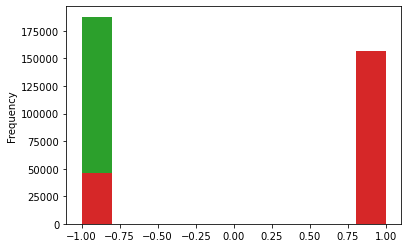

In [120]:
dataset["Wearing_Lipstick"].plot.hist()
dataset["Wearing_Necklace"].plot.hist()
dataset["Wearing_Necktie"].plot.hist()
dataset["Young"].plot.hist()

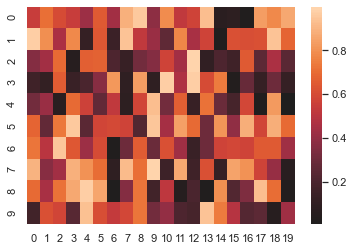

In [121]:
# Heatmap Of Dataset

import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()
uniform_data = np.random.rand(10, 20)
ax = sns.heatmap(uniform_data , center=0 )

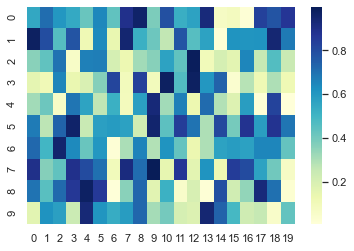

In [122]:
ax = sns.heatmap(uniform_data, cmap="YlGnBu")

<AxesSubplot:>

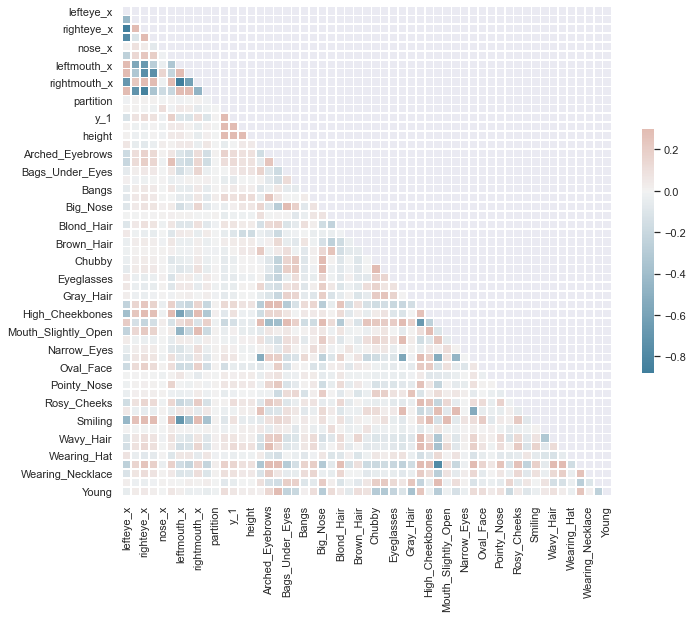

In [123]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

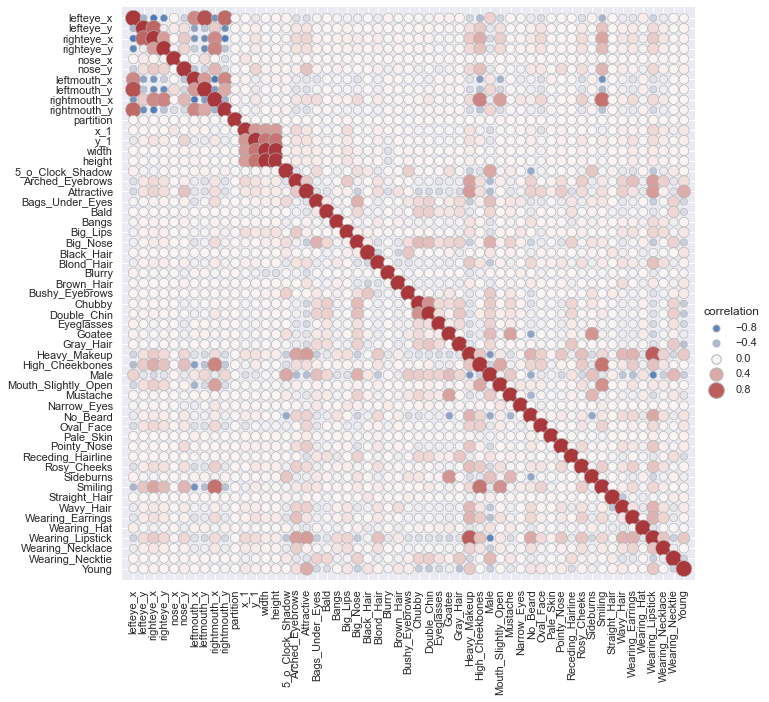

In [124]:
# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Compute a correlation matrix and convert to long-form
corr_mat = dataset.corr().stack().reset_index(name="correlation")

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x="level_0", y="level_1", hue="correlation", size="correlation",
    palette="vlag", hue_norm=(-1, 1), edgecolor=".7",
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel="", ylabel="", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".7")